### Método de Herón

In [87]:
import matplotlib.pyplot as plt
from math import sqrt

In [88]:
def heron(N, n=1, e=1e-5) -> float:
    """
    heron: Función que obtiene la raíz cuadrada de N con el método de Herón de Alejandría

    Params
    -------------
    N : número real (positivo)
        Número del cual se desea calcular la raíz
    n : número real (positivo)
        Valor inicial para la posible raíz
    e : número real (positivo)
        Error máximo aceptado
    
    Returns
    --------------
    n : número flotante (positivo)
        Raíz calculada
    """
    if N <= 0:
        return None
    err, i = 1.0, 0
    while err > e:
        print(i, ' => ', n, ' error:', err)
        i += 1
        plt.scatter(i, n, c='green', s=10)
        plt.scatter(i, err, c='red', s=10)
        nn = 0.5*(N/n + n)
        err = abs(n-nn)/n
        n = nn
    plt.xlabel('iteracion')
    plt.ylabel('raíz (verde) y error (rojo)')
    return n

0  =>  5  error: 1.0
1  =>  5.2  error: 0.040000000000000036
2  =>  5.196153846153846  error: 0.0007396449704141986


('math.sqrt = ', 5.196152422706632)

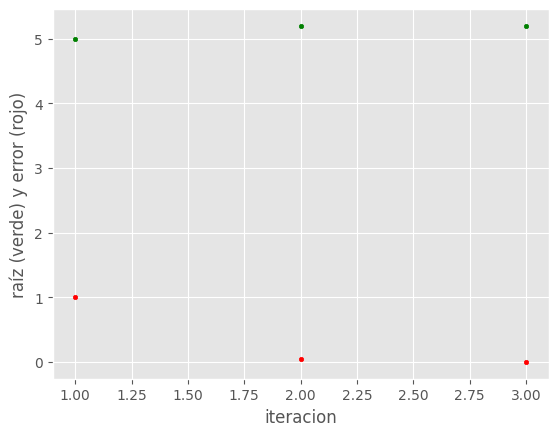

In [89]:
N, n = 27, 5
heron(N, n)
'math.sqrt = ', sqrt(27)

## Bisección

In [90]:
import numpy as np
import matplotlib as mpl
mpl.style.use('ggplot')

In [91]:
def grafica(f, c, fc):
    """
    docstring
    """
    c_c = c.copy()
    c_c.sort()
    x = np.linspace(c_c[0]-0.1, c_c[-1]+0.1, 100)
    plt.plot(x, f(x), color='green')
    plt.scatter(c, fc, c='red', s=10)
    plt.scatter(c[-1], fc[-1], c='blue', s=20, marker='*')
    plt.show()

In [92]:
def biseccion(f, a0, b0, emax=1e-5, iter_max=50, graf=False):
    """
    docstring
    """
    a, b = a0, b0
    error, i = 1.0, 0
    C, Fc = [], []
    while error > emax and i < iter_max:
        c = (a+b)/2
        fa = f(a)
        fc = f(c)
        C.append(c)
        Fc.append(fc)
        if fa * fc < 0:
            b = c
        else:
            a = c
        error = abs(fc)
        i += 1
    if graf:
        grafica(f, C, Fc)
    return i, c


In [93]:
def f1(x):
    return x**3 - 2*x**2 - 1

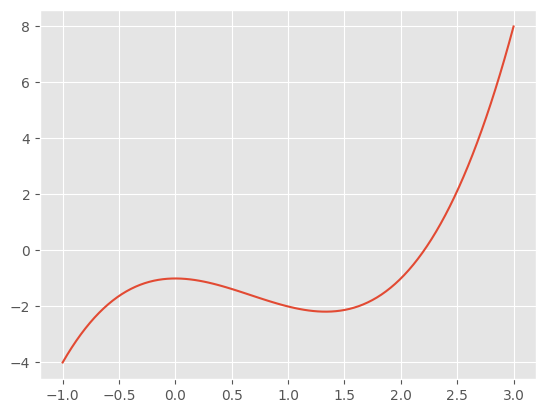

In [94]:
x = np.linspace(-1,3,100)
plt.plot(x, f1(x))
plt.show()

In [95]:
biseccion(f1, 1.5, 2.5)

(18, 2.2055702209472656)

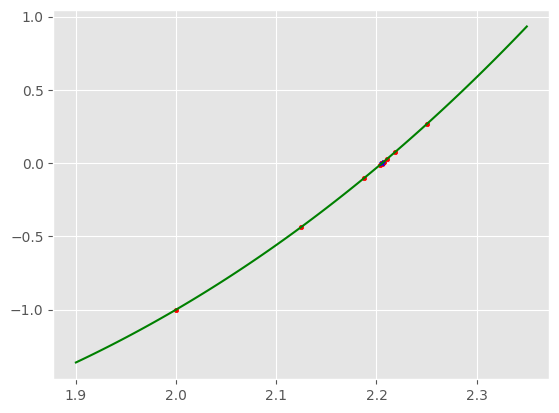

(18, 2.2055702209472656)

In [96]:
biseccion(f1, 1.5, 2.5, graf=True)

In [97]:
def f2(x):
    return np.sin(2*x) * (x**3 - 2*x**2 - 1)

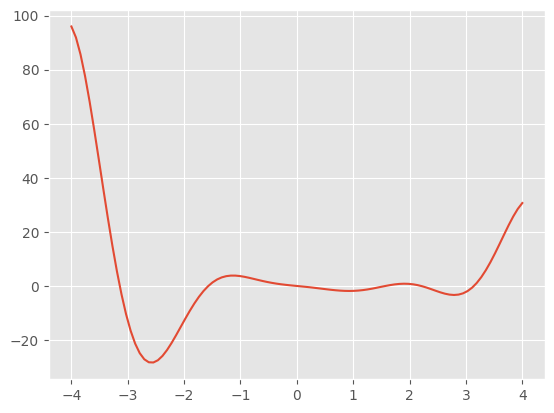

In [98]:
x = np.linspace(-4, 4, 100)
plt.plot(x, f2(x))
plt.show()

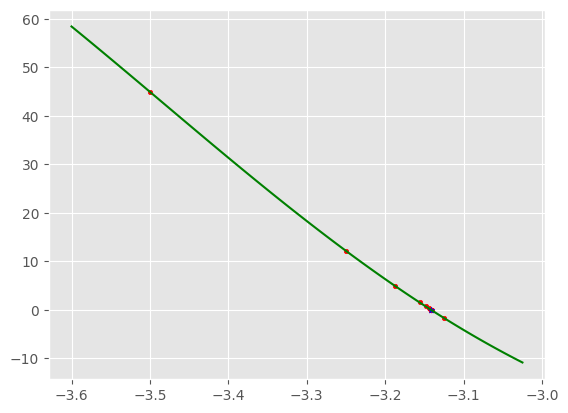

(22, -3.1415927410125732)

In [99]:
iter, raiz = biseccion(f2, -4, -3, graf=True)
iter, raiz

In [100]:
# Derivada numérica
def Df(f, x, dx=1e-3):
    return (f(x+dx)-f(x)) / dx

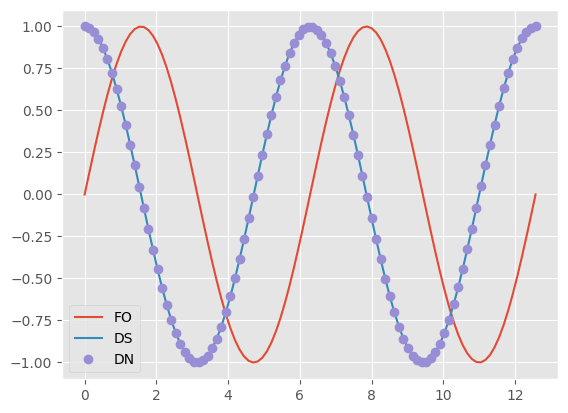

In [101]:
x = np.linspace(0, 4*np.pi, 100)
f = np.sin(x)
fp = np.cos(x)

plt.plot(x, f, label='FO')
plt.plot(x, fp, label = 'DS')
plt.plot(x, Df(np.sin, x), 'o', label='DN')
plt.legend()
plt.show()

## Newton Raphson

In [102]:
def newthon_raphson(f, x0, emax=1e-1, iter_max=50, graf=True):
    """
    docstring
    """
    error, i = 10, 0
    C, Fc = [], []
    while error > emax and i < iter_max:
        xi = x0-f(x0) / Df(f, x0)
        C.append(x0)
        Fc.append(f(x0))
        error = abs(f(xi)-f(x0))
        x0 = xi
        i += 1
    if graf:
        grafica(f, C, Fc)
    return i, x0

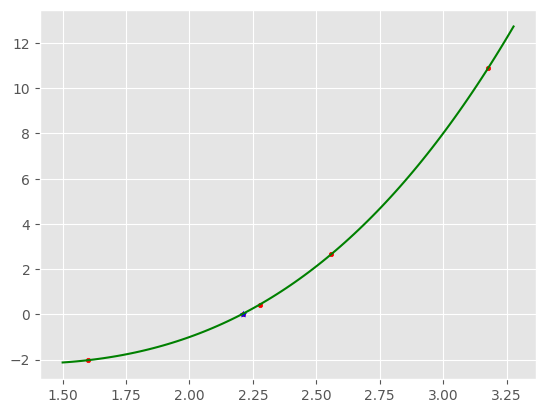

(5, 2.2055835548532996)

In [103]:
iter, raiz = newthon_raphson(f1, 1.6)
iter, raiz

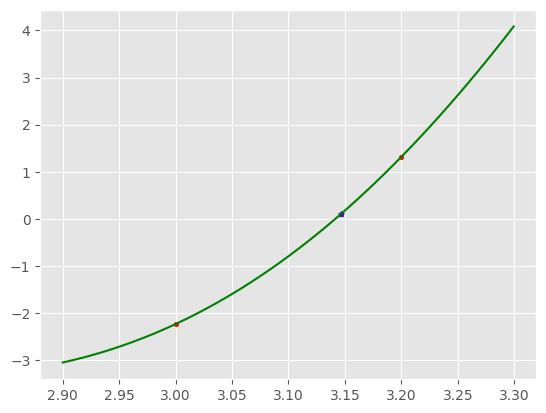

(3, np.float64(3.141637005572229))

In [104]:
iter, raiz = newthon_raphson(f2, 3)
iter, raiz